# Project Phase II: Gender & Speaker Recognition
- Hayat Awais Malik (21100016)
- Muhammad Junaid (21100025)
- Muhammad Sabeeh Rehman (21100186)
- Muhammad Shehryaar Sharif (21100146)
- Rabeeya Hamid (21100105)

In [1]:
!pip install python_speech_features

In [2]:
import python_speech_features as mfcc
from scipy.io.wavfile import read
import numpy as np
import os
import matplotlib.pyplot as plt
import time
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Downloading Dataset

In [3]:
!gdown --id 1GbfEJ4JnTGthMs4RP5z17BrCQm6YxtEG

Downloading...
From: https://drive.google.com/uc?id=1GbfEJ4JnTGthMs4RP5z17BrCQm6YxtEG
To: /content/LUMS_FALL2020_PROJECT_DATA.zip
802MB [00:05, 141MB/s]


In [ ]:
!unzip /content/LUMS_FALL2020_PROJECT_DATA.zip -d /content/dataset_project

## File Reading & Feature Extraction

In [5]:
# Function to extract audio features
def get_MFCC(audio, sr):
    features = mfcc.mfcc(audio, sr, 0.025, 0.01, 13, appendEnergy = True)
    return np.mean(features, axis=0)

In [6]:
sr, audio = read('/content/dataset_project/Gender_Recognition/Test/SPK083_M/1.wav')
features = get_MFCC(audio, sr)

In [7]:
Gender_Recognition_path='/content/dataset_project/Gender_Recognition/'
Speaker_Recognition_path='/content/dataset_project/Speaker_Recognition/'

Train_data_GR=[]
Test_data_GR=[]
Valid_data_GR=[]

labels_Train_data_GR=[]
labels_Test_data_GR=[]
labels_Valid_data_GR=[]

Train_data_SR=[]
Test_data_SR=[]
Valid_data_SR=[]

labels_Train_data_SR=[]
labels_Test_data_SR=[]
labels_Valid_data_SR=[]

Data_types_GR = os.listdir(Gender_Recognition_path)
Data_types_SR = os.listdir(Speaker_Recognition_path)

train_folder_GR=os.listdir(Gender_Recognition_path+"/"+Data_types_GR[2])
test_folder_GR=os.listdir(Gender_Recognition_path+"/"+Data_types_GR[1])
valid_folder_GR=os.listdir(Gender_Recognition_path+"/"+Data_types_GR[0])

train_folder_SR=os.listdir(Speaker_Recognition_path+"/"+Data_types_SR[2])
test_folder_SR=os.listdir(Speaker_Recognition_path+"/"+Data_types_SR[1])
valid_folder_SR=os.listdir(Speaker_Recognition_path+"/"+Data_types_SR[0])

# print(Data_types_SR)
# print(Data_types_GR)

#training features for Gender Recognition
for folder in train_folder_GR:
  if folder[-1] =="M":
    [labels_Train_data_GR.append(0) for i in range(10)]
  else:
    [labels_Train_data_GR.append(1) for i in range(10)]
  
  vn_folder=os.listdir(Gender_Recognition_path+"/"+Data_types_GR[2]+"/"+folder)
  for vn in vn_folder:
    sr, audio = read(Gender_Recognition_path+"/"+Data_types_GR[2]+"/"+folder+"/"+vn)
    features = get_MFCC(audio, sr)
    # print (features.shape)
    Train_data_GR.append(features)

#testing features for Gender Recognition
for folder in test_folder_GR:
  if folder[-1] =="M":
    [labels_Test_data_GR.append(0) for i in range(10)]
  else:
    [labels_Test_data_GR.append(1) for i in range(10)]
    
  vn_folder=os.listdir(Gender_Recognition_path+"/"+Data_types_GR[1]+"/"+folder)
  for vn in vn_folder:
    sr, audio = read(Gender_Recognition_path+"/"+Data_types_GR[1]+"/"+folder+"/"+vn)
    features = get_MFCC(audio, sr)
    # print (features.shape)
    Test_data_GR.append(features)

#Validation features for Gender Recognition
for folder in valid_folder_GR:
  if folder[-1] =="M":
    [labels_Valid_data_GR.append(0) for i in range(10)]
  else:
    [labels_Valid_data_GR.append(1) for i in range(10)]

  vn_folder=os.listdir(Gender_Recognition_path+"/"+Data_types_GR[0]+"/"+folder)
  for vn in vn_folder:
    sr, audio = read(Gender_Recognition_path+"/"+Data_types_GR[0]+"/"+folder+"/"+vn)
    features = get_MFCC(audio, sr)
    # print (features.shape)
    Valid_data_GR.append(features)


#training features for Speaker Recognition
for folder in train_folder_SR:
  [labels_Train_data_SR.append(int(folder[3:6]) - 1) for i in range(6)]
  vn_folder=os.listdir(Speaker_Recognition_path+"/"+Data_types_SR[2]+"/"+folder)
  for vn in vn_folder:
    sr, audio = read(Speaker_Recognition_path+"/"+Data_types_SR[2]+"/"+folder+"/"+vn)
    features = get_MFCC(audio, sr)
    # print (features.shape)
    Train_data_SR.append(features)

#testing features for Speaker Recognition
for folder in test_folder_SR:
  [labels_Test_data_SR.append(int(folder[3:6]) - 1) for i in range(2)]
  vn_folder=os.listdir(Speaker_Recognition_path+"/"+Data_types_SR[1]+"/"+folder)
  for vn in vn_folder:
    sr, audio = read(Speaker_Recognition_path+"/"+Data_types_SR[1]+"/"+folder+"/"+vn)
    features = get_MFCC(audio, sr)
    # print (features.shape)
    Test_data_SR.append(features)

#Validation features for Speaker Recognition
for folder in valid_folder_SR:
  [labels_Valid_data_SR.append(int(folder[3:6]) - 1) for i in range(2)]
  vn_folder=os.listdir(Speaker_Recognition_path+"/"+Data_types_SR[0]+"/"+folder)
  for vn in vn_folder:
    sr, audio = read(Speaker_Recognition_path+"/"+Data_types_SR[0]+"/"+folder+"/"+vn)
    features = get_MFCC(audio, sr)
    # print (features.shape)
    Valid_data_SR.append(features)


Train_data_GR=np.array(Train_data_GR)
Train_data_SR=np.array(Train_data_SR)

Test_data_GR=np.array(Test_data_GR)
Test_data_SR=np.array(Test_data_SR)

Valid_data_GR=np.array(Valid_data_GR)
Valid_data_SR=np.array(Valid_data_SR)



labels_Train_data_GR=np.array(labels_Train_data_GR)
labels_Train_data_SR=np.array(labels_Train_data_SR)

labels_Test_data_GR=np.array(labels_Test_data_GR)
labels_Test_data_SR=np.array(labels_Test_data_SR)

labels_Valid_data_GR=np.array(labels_Valid_data_GR)
labels_Valid_data_SR=np.array(labels_Valid_data_SR)


# train_entries_positive = os.listdir('/content/dataset_ass4/Dataset/train/pos')
# test_entries_negative = os.listdir('/content/dataset_ass4/Dataset/test/neg')
# test_entries_positive = os.listdir('/content/dataset_ass4/Dataset/test/pos') 

## Implementation Functions

### Helper Functions

#### Adding Bias
*   Parameter: feature vector; size: m x n-1 matrix
*   Returns: feature vector; size: m x n matrix

In [8]:
def append_bias(features):
  features = np.insert(features, 0, 1, axis=1)
  return features

#### Creating weights
*   Parameter: scalars n and c
*   Returns: weight vector; size: n x c matrix

In [9]:
def making_weights(n, c):
  weights = []
  for i in range(c):
    weights_class = np.ones(n) 
    weights.append(weights_class)
  weights = np.array(weights)
  weights = weights.T
  return weights

#### Hypothesis Function
*   Parameter: feature vector; size: m x n , weight vector; size: n x c
*   Returns: weight vector; size: m x c matrix

In [10]:
def h_x(features, weights):
  hypothesis_data = np.matmul(features, weights)
  return hypothesis_data

#### Softmax Function

*   Parameter: hypothesis data (with bias) size; m x c matrix
*   Returns: probability distribution over data; size: m x c matrix



In [11]:
def soft_max(hyp_data):
  shape = hyp_data.shape
  m = shape[0]
  c = shape[1]
  softmax = np.zeros(shape)
  for i in range(0, m):
    sum = 0
    for j in range(0, c): 
      softmax[i,j] = np.exp(hyp_data[i,j])
      sum = sum + softmax[i,j]
    softmax[i,:] = softmax[i,:]/sum
  return softmax

#### Prediction Function

*   Parameter: softmax array size; m x c matrix
*   Returns: predicted array; size: m x 1 matrix


In [12]:
def prediction(softmax_arr):
  return np.argmax(softmax_arr,axis=1)

#### Cross Entropy Loss

*   Parameters: 

  *   prob_dist: size= m x c 
  *   labels: size= m x 1 

*   Returns: total loss over , size: scalar

In [13]:
def ce_loss(labels, prob_dist):
  loss = 0
  shape = prob_dist.shape
  m = shape[0]
  c = shape[1]
  for i in range(0, m):
    for j in range(0, c):
      if labels[i] == j:
        loss = loss - np.log(prob_dist[i,j])
  return loss/m

#### Calculate Weight Deltas
- parameters:
    - features: feature vector (m, n)
    - labels: Label vector (m, 1)
    - prob_dist: probability distribution (m, c)
    - alpha: scalar learning rate
- returns: deltas to be updated (n, c)

In [14]:
def compute_weights(features, labels, prob_dist, alpha):
  func1 = np.zeros(prob_dist.shape)
  for i, row in enumerate(prob_dist):
    func1[i, labels[i]] = 1
  loss_der = np.zeros((features.shape[1], prob_dist.shape[1]))
  for c in range(prob_dist.shape[1]):
    for n in range(features.shape[1]):
      prob_diff = (func1[:, c] - prob_dist[:, c])
      sum_x=0
      for m in range(features.shape[0]):
        sum_x += features[m,n]* prob_diff[m]
      loss_der[n, c] = sum_x
  delta = (-alpha/features.shape[0]) * loss_der
  return delta

#### Gradient Descent
- parameters:
    - n_epoch: scalar
    - alpha: scalar
    - features: feature vector (m, n)
    - labels: label vector (m, 1)
    - weights: model weights (m, c)
- returns:
    - j: list representing training loss of length n_epoch
    - weights: learned model weights (m, c)

In [15]:
def grad_descent(n_epoch,alpha,features,labels,weights):
  j=[]
  for epoch in tqdm(range(n_epoch)):
    z=h_x(features,weights)
    activations=soft_max(z)
    deltas=compute_weights(features,labels,activations,alpha)
    weights -=  deltas
    j.append(ce_loss(labels,activations))
  return j, weights

### Multinomial LR Training
- parameters:
  - features: feature vector (m, n)
  - labels: label vector (m, 1)
  - n_epoch: scalar
  - alpha: scalar
- returns:
  - loss: list of length n_epoch
  - weights: weight vector (m, c)

In [16]:
def multinomial_lr_fit(features, labels, n_epoch=100, alpha=0.001):
  features = append_bias(features)
  m, n, c = features.shape[0], features.shape[1], len(set(labels))
  weights = making_weights(n, c)
  loss, weights = grad_descent(n_epoch, alpha, features, labels, weights)
  return loss, weights

### Multinomial LR Evaluation
- parameters:
  - features: feature vector (m, n)
  - labels: label vector (m, 1)
  - weights: weight vector (m, c)
- returns:
  - loss: scalar
  - predictions: prediction vector (m, 1)

In [17]:
def multinomial_lr_test(features, labels, weights):
  loss = -1
  rows = features.shape[0]
  features = append_bias(features)
  m, n, c = features.shape[0], features.shape[1], len(set(labels))
  z = h_x(features,weights)
  activations = soft_max(z)
  loss = ce_loss(labels,activations)
  predictions = prediction(activations)
  return loss, predictions

## Gender Recognition

### Hyper-Parameter Tuning
Validating with different combinations of alpha and n_epoch

#### Tuning alpha

In [18]:
# Hyper-parameter tuning
alphas = [1e-3, 1e-2, 1e-1, 1e-0]
# alphas = np.logspace(-4, 1, 100)
parameters = {"f1score":[],"train":[], "eval": [], "best_alpha_loss": alphas[0], "best_alpha_f1": alphas[0], "best_n_epoch": None, "train_loss": None, "weights": None, "predictions": None}
print("Tuning Alpha")
for alpha in tqdm(alphas):
  print("Training for alpha {}".format(alpha))
  epochs = 500
  train_loss, model_weights = multinomial_lr_fit(Train_data_GR, labels_Train_data_GR, epochs, alpha) # Fitting model to training data
  eval_loss, predictions = multinomial_lr_test(Valid_data_GR, labels_Valid_data_GR, model_weights) # Evaluating trained model on validation data
  report = classification_report(labels_Valid_data_GR, predictions, output_dict = True)
  macroF1 = report['macro avg']['f1-score']
  parameters["train"].append(train_loss[-1])
  parameters["eval"].append(eval_loss)
  parameters["f1score"].append(macroF1)
  parameters["best_alpha_loss"] = alpha if min(min(parameters["eval"]), eval_loss) == eval_loss else parameters["best_alpha_loss"]
  parameters["best_alpha_f1"] = alpha if max(max(parameters["f1score"]), macroF1) == macroF1 else parameters["best_alpha_f1"]
  # parameters['weights'][alpha] = model_weights

  print("Loss @ train: {}, eval: {}, f1-score: {}".format(train_loss[-1], eval_loss, macroF1))

# print("Minimum evaluation loss at alpha {}".format(parameters["best_alpha"]))

Tuning Alpha


Training for alpha 0.001



Loss @ train: 0.26737319139870147, eval: 0.378795065790651, f1-score: 0.6747034060466897
Training for alpha 0.01



Loss @ train: 0.26153484447960396, eval: 0.39399060883633313, f1-score: 0.6875
Training for alpha 0.1



Loss @ train: 1.6020080273742983, eval: 1.504069884114244, f1-score: 0.8274416346705503
Training for alpha 1.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':



Loss @ train: 12.908616639925665, eval: 18.986591406308015, f1-score: 0.5779310344827586



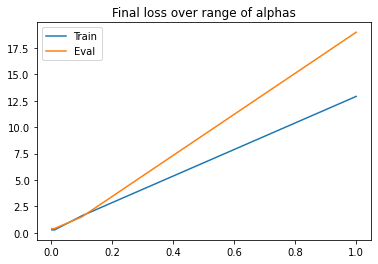

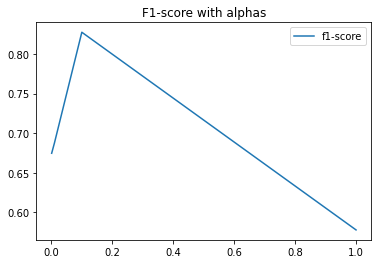

In [19]:
plt.plot(alphas, parameters["train"], label="Train")
plt.plot(alphas, parameters["eval"], label="Eval")
plt.legend()
plt.title("Final loss over range of alphas")
plt.show()

plt.plot(alphas, parameters["f1score"], label= "f1-score")
plt.legend()
plt.title("F1-score with alphas")
plt.show()


In [20]:
print("Highest Validation F1 score at : ", parameters['best_alpha_f1'])
print("Lowest Validation Loss at : ", parameters['best_alpha_loss'])

Highest Validation F1 score at :  0.1
Lowest Validation Loss at :  0.001


#### Tuning n_epoch

In [21]:
epochs = [epoch for epoch in range(100, 400, 100)]
parameters["train"] = []
parameters["eval"] = []
parameters["best_n_epoch"] = epochs[0]
for n_epoch in tqdm(epochs):
  print("Training for n_epoch {}".format(n_epoch) )
  alpha = parameters["best_alpha_f1"]
  train_loss, model_weights = multinomial_lr_fit(Train_data_GR, labels_Train_data_GR, n_epoch, alpha) # Fitting model to training data
  eval_loss, predictions = multinomial_lr_test(Valid_data_GR, labels_Valid_data_GR, model_weights) # Evaluating trained model on validation data
  parameters["train"].append(train_loss[-1])
  parameters["eval"].append(eval_loss)
  parameters["best_n_epoch"] = n_epoch if min(min(parameters["eval"]), eval_loss) == eval_loss else parameters["best_n_epoch"]
  if parameters["best_n_epoch"] == n_epoch: 
    parameters["train_loss"] = train_loss
    parameters["weights"] = model_weights
    parameters["predictions"] = predictions
    
  print("Loss @ train: {}, eval: {}".format(train_loss[-1], eval_loss))

print("Minimum evaluation loss at n_epoch {}".format(parameters["best_n_epoch"]))

Training for n_epoch 100



Loss @ train: 1.61089257532865, eval: 1.5067008531461918
Training for n_epoch 200



Loss @ train: 1.6029013983899176, eval: 1.5030534818004766
Training for n_epoch 300



Loss @ train: 1.6023789367336851, eval: 1.5032897322342427

Minimum evaluation loss at n_epoch 200


Text(0.5, 1.0, 'Final loss over range of epochs')

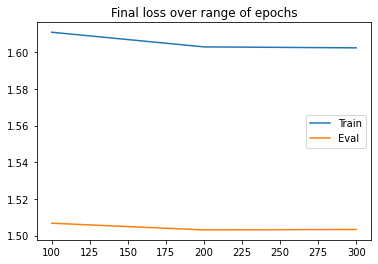

In [22]:
plt.plot(epochs, parameters["train"], label="Train")
plt.plot(epochs, parameters["eval"], label="Eval")
plt.legend()
plt.title("Final loss over range of epochs")

### Evaluation


Training Loss: 1.6029013983899176
Evaluation Loss: 2.191748928728806


Text(0.5, 1.0, 'Final Training Loss')

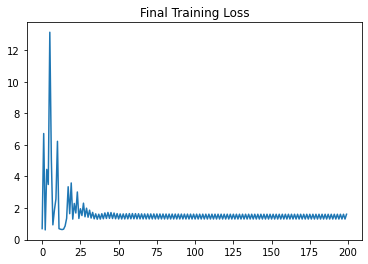

In [23]:
train_loss, model_weights = multinomial_lr_fit(Train_data_GR, labels_Train_data_GR, parameters['best_n_epoch'], parameters['best_alpha_f1'])
eval_loss, predictions = multinomial_lr_test(Test_data_GR, labels_Test_data_GR, model_weights)
print("Training Loss:", train_loss[-1])
print("Evaluation Loss:", eval_loss)

plt.plot(train_loss)
plt.title("Final Training Loss")

In [24]:
print("Report on test data")
print(classification_report(labels_Test_data_GR, predictions))
print(confusion_matrix(labels_Test_data_GR, predictions))

Report on test data
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       130
           1       0.62      0.93      0.74        40

    accuracy                           0.85       170
   macro avg       0.79      0.87      0.82       170
weighted avg       0.89      0.85      0.86       170

[[107  23]
 [  3  37]]


## Speaker Recognition


### Hyper-Parameter Tuning
Validating with different combinations of alpha and n_epoch

#### Tuning alpha

In [25]:
# Hyper-parameter tuning
alphas = [0.01, 0.1, 0.5]
parameters = {"f1score":[],"train":[], "eval": [], "best_alpha_loss": alphas[0], "best_alpha_f1": alphas[0], "best_n_epoch": None, "train_loss": None, "weights": None, "predictions": None}
print("Tuning Alpha")
for alpha in tqdm(alphas):
  print("Training for alpha {}".format(alpha))
  epochs = 50
  train_loss, model_weights = multinomial_lr_fit(Train_data_SR, labels_Train_data_SR, epochs, alpha) # Fitting model to training data
  eval_loss, predictions = multinomial_lr_test(Valid_data_SR, labels_Valid_data_SR, model_weights) # Evaluating trained model on validation data
  report = classification_report(labels_Valid_data_SR, predictions, output_dict = True)
  macroF1 = report['macro avg']['f1-score']
  parameters["train"].append(train_loss[-1])
  parameters["eval"].append(eval_loss)
  parameters["f1score"].append(macroF1)
  parameters["best_alpha_loss"] = alpha if min(min(parameters["eval"]), eval_loss) == eval_loss else parameters["best_alpha_loss"]
  parameters["best_alpha_f1"] = alpha if max(max(parameters["f1score"]), macroF1) == macroF1 else parameters["best_alpha_f1"]
  # parameters['weights'][alpha] = model_weights

  print("Loss @ train: {}, eval: {}, f1-score: {}".format(train_loss[-1], eval_loss, macroF1))

# print("Minimum evaluation loss at alpha {}".format(parameters["best_alpha"]))

Tuning Alpha


Training for alpha 0.01



Loss @ train: 3.704484560552359, eval: 3.731948454561671, f1-score: 0.4640809503485559
Training for alpha 0.1


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Loss @ train: 0.9923018815169995, eval: 1.1540407789856857, f1-score: 0.9185446009389672
Training for alpha 0.5



Loss @ train: 0.2868683472645237, eval: 0.49279602169680536, f1-score: 0.912206572769953



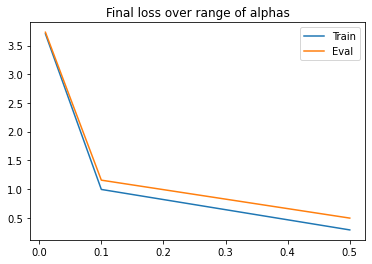

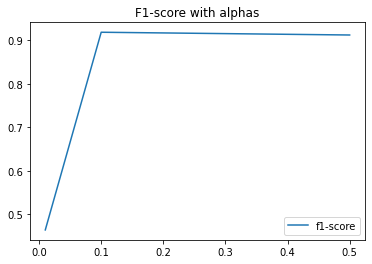

In [26]:
plt.plot(alphas, parameters["train"], label="Train")
plt.plot(alphas, parameters["eval"], label="Eval")
plt.legend()
plt.title("Final loss over range of alphas")
plt.show()

plt.plot(alphas, parameters["f1score"], label= "f1-score")
plt.legend()
plt.title("F1-score with alphas")
plt.show()


In [27]:
print("Highest Validation F1 score at : ", parameters['best_alpha_f1'])
print("Lowest Validation Loss at : ", parameters['best_alpha_loss'])
print("Due to smaller delta in F1 but steep decrease in loss, we chose a higher value of alpha={}".format(0.25))

parameters["best_alpha_f1"] = 0.25

Highest Validation F1 score at :  0.1
Lowest Validation Loss at :  0.5
Due to smaller delta in F1 but steep decrease in loss, we chose a higher value of alpha=0.25


#### Tuning n_epoch

In [28]:
epochs = [epoch for epoch in range(25, 150, 50)]
parameters["train"] = []
parameters["eval"] = []
parameters["best_n_epoch"] = epochs[0]
for n_epoch in tqdm(epochs):
  print("Training for n_epoch {}".format(n_epoch) )
  alpha = parameters["best_alpha_f1"]
  train_loss, model_weights = multinomial_lr_fit(Train_data_SR, labels_Train_data_SR, n_epoch, alpha) # Fitting model to training data
  eval_loss, predictions = multinomial_lr_test(Valid_data_SR, labels_Valid_data_SR, model_weights) # Evaluating trained model on validation data
  parameters["train"].append(train_loss[-1])
  parameters["eval"].append(eval_loss)
  parameters["best_n_epoch"] = n_epoch if min(min(parameters["eval"]), eval_loss) == eval_loss else parameters["best_n_epoch"]
  if parameters["best_n_epoch"] == n_epoch: 
    parameters["train_loss"] = train_loss
    parameters["weights"] = model_weights
    parameters["predictions"] = predictions
    
  print("Loss @ train: {}, eval: {}".format(train_loss[-1], eval_loss))

print("Minimum evaluation loss at n_epoch {}".format(parameters["best_n_epoch"]))

Training for n_epoch 25



Loss @ train: 0.8220844684197617, eval: 0.9811022802131686
Training for n_epoch 75



Loss @ train: 0.31162210909433347, eval: 0.5158771713678517
Training for n_epoch 125



Loss @ train: 0.2002274236463323, eval: 0.4130610707571866

Minimum evaluation loss at n_epoch 125


Text(0.5, 1.0, 'Final loss over range of epochs')

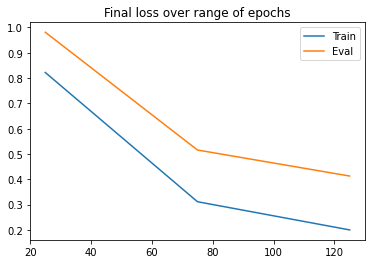

In [29]:
plt.plot(epochs, parameters["train"], label="Train")
plt.plot(epochs, parameters["eval"], label="Eval")
plt.legend()
plt.title("Final loss over range of epochs")

### Evaluation


Training Loss: 0.2002274236463323
Evaluation Loss: 0.4137239297794974


Text(0.5, 1.0, 'Final Training Loss')

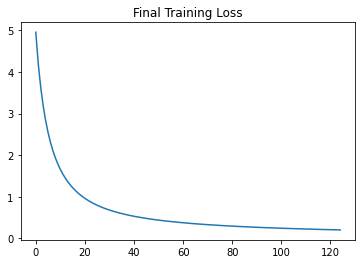

In [30]:
train_loss, model_weights = multinomial_lr_fit(Train_data_SR, labels_Train_data_SR, parameters['best_n_epoch'], parameters['best_alpha_f1'])
eval_loss, predictions = multinomial_lr_test(Test_data_SR, labels_Test_data_SR, model_weights)
print("Training Loss:", train_loss[-1])
print("Evaluation Loss:", eval_loss)

plt.plot(train_loss)
plt.title("Final Training Loss")

In [35]:
print("================= {} ==================".format("Test Report"))
print(classification_report(labels_Test_data_SR, predictions))
print("================= {} ==================".format("Confusion Matrix"))
print(confusion_matrix(labels_Test_data_SR, predictions))

================= Test Report ==================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       0.67      1.00      0.80         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.0